안녕하세요! sssssun 입니당 :)!😎

이번주는 sklearn을 활용한 차원 축소에 대해 공부해봤습니다.

### **차원 축소란?**
 
데이터셋은 보통 매우 많은 피처로 구성된 다차원의 구성을 가지는데, 차원 축소란 이런 다차원 데이터셋의 차원을 임의의 새로운 차원으로 축소하는 것입니다.


데이터셋의 차원이 증가하고, 이러한 고차원에 데이터가 흩뿌려져 있게 됩니다.

이렇게 고차원일수록 데이터와 데이터 사이의 공간이 너무 넓어지고, 공간의 구조가 복잡해지는데, 머신러닝 알고리즘에 이런 고차원의 데이터를 넣는다면 예측 성능이 현저히 떨어지게 됩니다.






그렇다면, 다차원을 축소하여 얻을 수 있는 효과가 무엇일까요?

**- 시각화 (Visualization)**


우리가 구현해낼 수 있는 차원은 x, y, z 축의 3차원까지이기 때문에 3차원이 넘어간 데이터셋의 시각화는 불가능합니다. 따라서 차원 축소를 통해 다차원의 데이터셋도 시각화를 하여 데이터 패턴을 쉽게 인지할 수 있습니다.

**- 노이즈 제거 (Reduce Noise)**


쓸모없는 피처들를 제거함으로써 노이즈를 제거할 수 있습니다.

**- 메모리 절약 (Preserve useful info in low memory)**


쓸모없는 피처들을 삭제함으로써 메모리도 절약할 수 있습니다.

**- 모델 성능 향상**

불필요한 피처들을 제거하기 때문에 더욱 성능이 뛰어나고 효과적인 모델을 만들 수 있습니다.

차원 축소는 **피처 선택**과 **피처 추출**로 나눌 수 있습니다.


피처 선책은 불필요한 피처는 아예 제거하는 것이고 피처 추출은 기존의 다차원 피처들을 저차원의 중요 피처로 압축해서 추출하는 것입니다.


이렇게 새롭게 추출된 중요 피처는 기존의 피처와는 완전히 다른 값이 되죠.


피처 선택의 장점은 선택한 피처의 해석이 용이하다는 점이고 단점은 피처간 상관관계를 고려하기 어렵다는 점입니다.

피처 추출의 장점은 피처 간 상관관계를 고려하기 용이하고 피처의 개수를 많이 줄일 수 있다는 점이고 단점은 추출된 변수의 해석이 어렵다는 점입니다.


차원 축소는 단순히 데이터를 압축하는 것이 아닌 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데에 있습니다.


차원 축소 알고리즘은 이미지 분류 등의 분류 수행 시에 과적합을 방지할 수 있고 텍스트 문서의 숨겨진 의미를 추출할 수 있습니다.

### **PCA(Principal Component Analysis)**

우리는 차원축소의 방법 중 하나인 **PCA (Principal Component Analysis)**를 이용해보겠습니다.

PCA 기법의 핵심은 데이터를 축에 사영했을 때 가장 높은 분산을 가지는 데이터의 축을 찾아 그 축으로 차원을 축소합니다.

이 가장 높은 분산을 가지는 축을 주성분이라고 합니다.

사영했을 때 분산이 크다는 것은 원래 데이터의 분포를 잘 설명할 수 있다는 것을 뜻하고 정보의 손실을 최소화 할 수 있다는 것을 뜻합니다. 

PCA 차원축소 방식을 이해하기 위해서는 수학적인 지식이 필요합니다.

먼저 기존의 데이터셋에 공분산 행렬을 생성하고, 고유벡터와 그 값을 계산합니다.

그리고 고유값이 큰 순서대로 정렬 후 변환해야할 차원의 수에 따라 고유값을 정하고 고유 벡터에 투영하여 차원을 축소하게 됩니다.

그럼, iris dataset을 활용하여 PCA 를 구현해보겠습니다.

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris 

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


데이터셋을 데이터 프레임으로 보거나, 피처명을 출력해보니 피처가 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)' 이렇게 4개 존재하는 것을 알 수 있네요.

피처가 4개이기 때문에, 시각화가 불가능합니다.

따라서 우리가 임의로 'sepal length (cm)', 'sepal width (cm)' 2개를 선택하여 시각화해주었습니다.

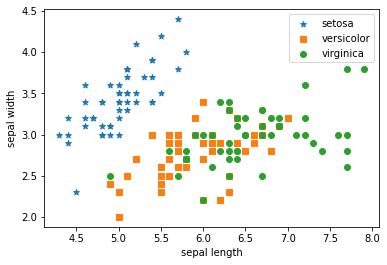

In [31]:
markers = ["*", "s", "o"] 

for i, marker in enumerate(markers): 
  x_val = iris_df[iris_df["target"] ==i]["sepal length (cm)"] 
  y_val = iris_df[iris_df["target"]==i]["sepal width (cm)"] 
  plt.scatter(x_val, y_val, marker=marker,label=iris.target_names[i]) 

plt.legend() 
plt.xlabel("sepal length") 
plt.ylabel("sepal width") 
plt.show()

피처 2개만 선택하여 시각화하니, versicolor와 virginica는 잘 분류가 되지 않는 모습입니다.

(당연히 일부 피처만 반영했기 때문에 어쩔 수 없는 결과입니다.)

주성분 분석법은 공분산 행렬을 이용하기 때문에, 단위와 분포가 다른 각각의 피처 데이터들을 표준화시켜주는 과정이 필요합니다.

따라서, StandardScaler를 활용하여 평균 0, 분산 1으로 피처 데이터셋을 데이터 스케일링을 진행해줍니다. 

제가 데이터 스케일링에 대해서 작성한 포스팅이 있으니, 관심 있으신 분들은 참고하셔도 좋을 것 같아요!

-> -> [sklearn으로 데이터 스케일링(Data Scaling)하는 5가지 방법🔥](https://dacon.io/codeshare/4526)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(iris_df)

그리고 PCA를 import 해서 차원 축소를 진행해주었습니다.

여기서 n_components 는 축소하고 싶은 차원의 수를 넣어주면 됩니다.

데이터 스케일링처럼, fit과 transform의 과정을 거쳐줍니다.

In [16]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca.fit(data_scaled) 
df_pca = pca.transform(data_scaled)
print(df_pca.shape)

(150, 2)


표준화나 pca 변환 후에는 numpy array 형태를 갖기 때문에 shape 을 출력하면 차원이 2로 축소된 것을 확인할 수 있습니다.

numpy array 형태의 데이터셋을 target column을 추가하여 데이터프레임 형태로 바꾸어주었습니다.

In [22]:
df_pca = pd.DataFrame(data=df_pca)
df_pca["target"] = iris.target
df_pca.head()

,0,1,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


이제 축소된 차원으로 시각화를 진행해보겠습니다.



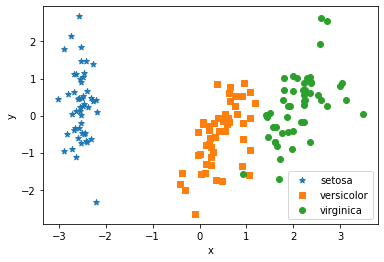

In [21]:
markers = ["*", "s", "o"] 

for i, marker in enumerate(markers):
  x_val = df_pca[df_pca["target"] ==i][0] 
  y_val = df_pca[df_pca["target"]==i][1] 
  plt.scatter(x_val, y_val, marker=marker,label=iris.target_names[i]) 
plt.legend() 
plt.xlabel("x") 
plt.ylabel("y") 
plt.show() 

PCA 이전에 피처 두개를 선택하여 나타냈던 시각화에 비해 versicolor와 virginica가 훨씬 분류가 잘 되어 있는 것을 확인할 수 있습니다.

 
그래프를 보면 데이터가 x 축을 기반으로 서로 겹치는 부분이 별로 존재하지 않게 잘 분류되어 있는 것을 확인할 수 있습니다.


이는 x축이 된 첫 번째 주성분이 원본 데이터의 변동성을 잘 반영했기 때문입니다.

 

pca.explained_variance_ratio_로 주성분들이 데이터를 얼마나 잘 설명하고 있는지 볼 수 있습니다.

In [45]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


x축의 주성분요소는 76%, y축의 주성분 요소는 18%정도로, 원본 데이터의 약 94%를 설명할 수 있습니다.


이제, 모델의 정확도를 평가해보겠습니다.

알고리즘은 RandomForestClassifier를 이용했습니다.

In [24]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score 

In [27]:
rf = RandomForestClassifier() 
scores = cross_val_score(rf, iris.data, iris.target, scoring="accuracy",cv=3) 
print("원본 데이터 예측 정확도 : ", round(np.mean(scores),4))

원본 데이터 예측 정확도 :  0.96


In [29]:
rf = RandomForestClassifier() 
scores = cross_val_score(rf, df_pca.iloc[:,:-1], iris.target, scoring="accuracy", cv=3) 
print("pca 후 예측 정확도 : ", round(np.mean(scores),4))

pca 후 예측 정확도 :  0.9867


pca 이후 모델의 예측 정확도가 상승하였지만, **보통 차원이 축소하여 데이터의 수가 감소하기 때문에 정확도가 떨어지는 것이 일반적입니다.**

이렇게, 이번 포스팅은 차원 축소에 대해 알아보았습니다.

읽어주셔서 감사합니다~:)